## Nonlinear ODE

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import matplotlib.pyplot as plt
import numpy as np

### Example
We show how to solve the following non liner ODE:
$$ \begin{cases}y'(t) = -y^2\\y(0)= 1\end{cases}$$

which has as solution, $y(x) = \frac{1}{x+1}$.

In [2]:
DiffEq = NonLinearODE(1);
DiffEq.setDomain(0.0,2.0)
DiffEq

Non Linear ODE of 1-th order defined on the interval (0.000000,2.000000)

In [3]:
DiffEq.setCoeff(lambda t : 1,lambda Dy,t: -Dy[0]**2)
DiffEq.setIC([1.0])

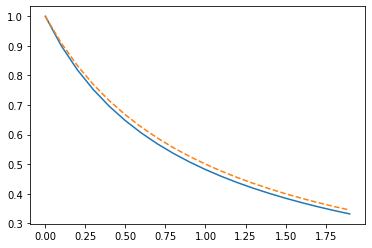

In [4]:
[H,u] = DiffEq.Euler(0.1)
plt.plot(H,u)
plt.plot(H,[1/(h+1) for h in H],"--")

### Example - Gravity Pendulum

In [5]:
DiffEqs = NonLinearODEs(1);
DiffEqs.setDomain(0.0,40.0);
DiffEqs

Non Linear ODE of 1-th order defined on the interval (0.000000,40.000000)

In [6]:
alpha = 1.0;
beta = 0.0;
def f(y,t):
    v = vec(2);
    v.from_Array([y[0][2],-alpha*np.sin(y[0][1])-beta*y[0][2]]);
    return v;
def m(t):
    I = spmat(2,2);
    return I;

$$\begin{bmatrix}\dot{\theta}(t)\\\dot{v}(t)\end{bmatrix}=\begin{bmatrix}v\\ -\alpha \sin(\theta) -\beta v\end{bmatrix}$$

In [7]:
DiffEqs.setCoeff(m,f)
IC = vec(2);
IC.from_Array([0.5,0.0])
DiffEqs.setIC([IC]);

In [8]:
[H, Y] = DiffEqs.Euler(0.1)
Theta = [y[1] for y in Y]
V = [y[2] for y in Y]

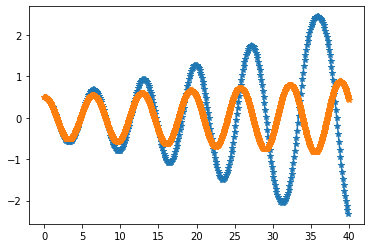

In [9]:
[H2, Y] = DiffEqs.Euler(0.03)
Theta2 = [y[1] for y in Y]
V2 = [y[2] for y in Y]
plt.plot(H,Theta,"*-")
plt.plot(H2,Theta2,"*-")

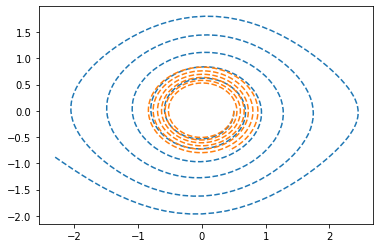

In [10]:
plt.plot(Theta,V,"--")
plt.plot(Theta2,V2,"--")

### Example - Susceptible, Infected and Removed (SIR) Model

In [31]:
DiffEqs = NonLinearODEs(1);
DiffEqs.setDomain(0.0,80.0);
DiffEqs

Non Linear ODE of 1-th order defined on the interval (0.000000,80.000000)

In [32]:
beta = 0.5;
gamma = 0.1; 
def f(y,t):
    v = vec(2);
    v.from_Array([-beta*y[0][1]*y[0][2],beta*y[0][1]*y[0][2]-gamma*y[0][2]]);
    return v;
def m(t):
    I = spmat(2,2);
    return I;

In [33]:
DiffEqs.setCoeff(m,f)
IC = vec(2);
IC.from_Array([0.99,0.01])
DiffEqs.setIC([IC]);

In [36]:
[H, Y] = DiffEqs.RK(0.01,1)
S = [y[1] for y in Y]
I = [y[2] for y in Y]
R = [1-y[1]-y[2] for y in Y]

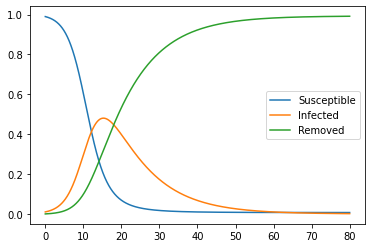

In [40]:
plt.plot(H,S,"-")
plt.plot(H,I,"-")
plt.plot(H,R,"-")
plt.legend(["Susceptible","Infected","Removed"])

In [44]:
print("The maximum value for I(t) is {} and it is rached on the {}th day".format(max(I),H[I.index(max(I))]))

The maximum value for I(t) is 0.48040078483857024 and it is rached on the 15.280000000000001th day
